In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load data

In [2]:
train = pd.read_csv('train_data.csv')
train

,user_id,item_id,rating
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1
...,...,...,...
28444,2238,1127,1
28445,2238,1920,1
28446,2238,2006,1
28447,2238,428,1


In [3]:
test = pd.read_csv('test_data.csv')
test

,user_id,item_id
0,0,2158
1,0,2113
2,0,2070
3,0,2026
4,0,1948
...,...,...
223895,2238,53
223896,2238,37
223897,2238,27
223898,2238,18


In [4]:
valid = pd.read_csv('validation_data.csv')
valid[valid['rating'] == 1]

,user_id,item_id,rating
0,0,43,1
100,1,86,1
200,2,94,1
300,3,106,1
400,4,114,1
...,...,...,...
223400,2234,1093,1
223500,2235,2124,1
223600,2236,56,1
223700,2237,106,1


In [5]:
item = pd.read_csv('item_fea.csv')
item

,Unnamed: 0,fea_0,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_140,fea_141,fea_142,fea_143,fea_144,fea_145,fea_146,fea_147,fea_148,fea_149
0,0,-0.059138,0.445023,0.434784,-0.002268,0.051577,0.255251,0.088059,0.260075,-0.040229,...,0.218243,0.305371,0.131283,0.604205,0.156294,0.014818,0.307943,0.885894,0.448740,0.114226
1,1,-0.036095,0.296636,0.683838,0.045720,-0.051367,0.595819,-0.008529,0.209537,0.008211,...,-0.109511,0.102012,0.074569,0.742033,0.150169,0.137498,0.264833,0.918470,0.252392,0.217043
2,2,-0.789944,-0.009038,-0.117730,0.428733,-0.300043,0.278383,0.497437,-0.271460,-0.002647,...,0.032246,-0.429274,-0.531839,0.327845,0.367732,0.407756,0.025253,0.241589,-0.127064,0.173381
3,3,-0.201070,0.316173,0.253146,0.059307,-0.038164,0.275562,-0.154885,0.010492,0.101456,...,0.258593,0.098354,-0.350636,0.994348,0.013166,0.369540,0.174142,0.707064,0.469137,0.262380
4,4,-0.586060,0.428001,0.104813,0.035911,-0.668778,0.471825,0.216815,-0.350574,-0.182772,...,-0.052275,-0.214053,-0.129578,0.078886,0.303341,0.086016,-0.185985,0.431955,0.186745,0.187713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2169,-0.366968,0.157899,-0.019499,0.198107,0.034789,0.541277,-0.055168,-0.031729,-0.048176,...,0.179271,-0.061474,-0.134971,0.619893,0.151097,0.356197,0.082364,0.377981,0.152409,0.322049
2170,2170,-0.003101,0.474982,0.184528,-0.072679,-0.286527,0.602689,-0.027034,-0.193502,-0.342228,...,-0.171213,-0.183854,0.006378,0.670806,0.085740,-0.047439,-0.025858,1.083711,0.215371,0.116725
2171,2171,0.015319,0.539924,0.142802,0.182064,-0.045185,-0.781630,-0.043399,-0.656324,-0.429629,...,0.042735,0.153905,-0.117986,0.332773,1.056229,0.392021,0.136627,0.274312,0.319719,-0.502290
2172,2172,-0.014664,0.249877,0.520696,0.277130,0.571637,-0.055869,0.023226,0.293835,0.044577,...,0.497207,0.246664,0.150732,0.742176,0.164758,0.230714,0.210047,0.324801,0.102207,0.466711


In [6]:
user = pd.read_csv('user_fea.csv')
user

,Unnamed: 0,fea_0,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,fea_140,fea_141,fea_142,fea_143,fea_144,fea_145,fea_146,fea_147,fea_148,fea_149
0,0,-0.053457,0.215744,0.234885,0.051006,-0.088019,-0.080856,0.100845,-0.286014,-0.102010,...,0.029278,-0.122111,-0.135396,0.511482,0.399618,0.237632,-0.047413,0.567280,0.242979,-0.142149
1,1,-0.086629,0.144392,0.268485,-0.014556,-0.013292,0.107507,0.019537,-0.144638,-0.073580,...,0.016838,-0.201972,-0.538234,0.597452,0.101860,0.179332,-0.175206,0.619533,0.184434,-0.206654
2,2,-0.046980,0.425904,0.525481,0.235569,0.228168,0.143114,0.077012,0.142191,-0.095806,...,0.461717,-0.059015,0.022990,0.691396,0.327900,0.052978,0.256679,0.343229,0.342330,0.127288
3,3,-0.369820,-0.343279,-0.120329,0.144944,0.037425,-0.301520,0.070085,-0.224280,0.205717,...,-0.319620,-0.171414,-0.311240,0.293136,0.103864,0.464217,-0.319494,0.124970,0.110059,0.223307
4,4,-0.267244,0.260761,0.432656,-0.076063,0.029464,-0.245288,-0.015159,-0.053729,-0.032154,...,-0.196028,-0.051416,0.281771,0.823062,0.109487,0.080115,0.032975,0.585842,-0.252253,0.285554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2234,0.235659,-0.120033,0.382047,-0.019677,0.302525,-0.614707,0.024702,-0.069103,0.125891,...,0.025992,-0.097754,-0.006762,0.459156,0.673337,0.034223,0.031333,0.060661,-0.183467,0.111361
2235,2235,0.132407,0.096867,0.415007,0.168485,0.142631,0.172334,0.122058,0.411436,0.156151,...,0.452837,0.290104,0.126654,0.796633,0.299593,0.047389,0.314145,0.501755,0.325496,0.462366
2236,2236,-0.119167,0.373997,0.312386,-0.034244,0.009013,0.052759,0.044793,-0.010029,-0.145516,...,-0.006534,0.018568,0.271020,0.703286,0.495377,0.127171,0.047923,0.662224,-0.041559,0.092098
2237,2237,-0.311304,0.454307,0.523138,0.016464,-0.232180,0.005053,0.012021,-0.067508,0.011220,...,-0.105687,-0.149495,0.036232,0.803526,0.509472,0.218054,0.243447,0.593708,-0.051410,0.073109


In [7]:
link = pd.read_csv('links.csv')
link

,src,des,weight
0,33,1587,1
1,33,2124,1
2,39,1067,1
3,39,1697,1
4,39,1588,1
...,...,...,...
23619,2001,162,1
23620,2001,1301,1
23621,2001,1676,1
23622,2001,1025,1


In [8]:
sample = pd.read_csv('sample_solution_data.csv')
sample

,user_id,item_id
0,0,1295
1,0,1454
2,0,150
3,0,2113
4,0,2070
5,0,2026
6,0,1695
7,0,400
8,0,1944
9,0,1889


# 2. Cluster items

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=200, random_state=0).fit(item)
item_cluster = kmeans.labels_
item_cluster

array([  8,   8,   8, ..., 131, 131, 131], dtype=int32)

# 2. Cluster users

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(user)
user_cluster = kmeans.labels_
user_cluster

array([8, 8, 8, ..., 4, 4, 4], dtype=int32)

# 3. Weight items with self

In [11]:
item_dict = dict()
for i in train[train['user_id'] == 0]['item_id']:
    if item_cluster[i] in item_dict:            
        item_dict[item_cluster[i]] += 100
    else:
        item_dict[item_cluster[i]] = 100
item_dict

{8: 1000, 151: 1000, 101: 1000, 186: 1000, 49: 300}

# 4. Link other users

In [12]:
link_list = list()
for i in link[link['src'] == 0]['des']:
    link_list.append(i)
link_list

[1136,
 141,
 1604,
 1410,
 1032,
 2096,
 634,
 1370,
 1928,
 1357,
 1480,
 1067,
 1675,
 1680,
 1301,
 1190,
 675,
 2135,
 2144,
 1713,
 695,
 50,
 662,
 1397,
 390,
 1237,
 1348,
 1440,
 396,
 2173,
 425,
 1514,
 529,
 1140,
 576,
 1461,
 1010,
 460,
 1334,
 1151,
 1717,
 478,
 1,
 1292,
 1578,
 381,
 1784,
 249,
 1386,
 1845,
 1777,
 2099]

# 5. Weight items with other users

In [13]:
for j in link_list:
    if user_cluster[j] == user_cluster[0]:
        w = 10
    else:
        w = 1
    for i in train[train['user_id'] == j]['item_id']:
        if item_cluster[i] in item_dict:            
            item_dict[item_cluster[i]] += w
        else:
            item_dict[item_cluster[i]] = w  
item_dict

{8: 1005,
 151: 1018,
 101: 1018,
 186: 1007,
 49: 384,
 124: 4,
 120: 6,
 79: 11,
 159: 11,
 4: 6,
 68: 15,
 139: 33,
 75: 18,
 103: 18,
 168: 26,
 178: 12,
 52: 18,
 180: 18,
 39: 17,
 86: 13,
 153: 12,
 55: 23,
 108: 16,
 87: 12,
 41: 19,
 2: 17,
 133: 5,
 194: 2,
 106: 13,
 166: 8,
 48: 5,
 77: 9,
 192: 4,
 32: 7,
 94: 4,
 99: 9,
 20: 5,
 72: 4,
 105: 15,
 155: 8,
 12: 4,
 110: 119,
 116: 2,
 128: 5,
 7: 7,
 71: 3,
 182: 9,
 5: 6,
 62: 8,
 29: 14,
 100: 5,
 42: 2,
 131: 7,
 113: 8,
 14: 6,
 34: 4,
 91: 6,
 67: 9,
 123: 4,
 109: 137,
 137: 6,
 90: 9,
 16: 15,
 69: 8,
 114: 3,
 1: 11,
 181: 86,
 121: 6,
 167: 11,
 138: 7,
 164: 5,
 150: 9,
 176: 7,
 53: 4,
 117: 7,
 163: 6,
 170: 2,
 56: 9,
 165: 10,
 130: 20,
 83: 6,
 158: 5,
 0: 3,
 93: 8,
 46: 3,
 119: 6,
 45: 7,
 78: 3,
 84: 5,
 135: 5,
 92: 3,
 160: 4,
 37: 6,
 31: 8,
 43: 6,
 33: 2,
 175: 10,
 89: 1,
 27: 1,
 199: 5,
 81: 7,
 97: 9,
 191: 2,
 171: 8,
 169: 2,
 60: 9,
 76: 4,
 140: 3,
 172: 7,
 73: 4,
 112: 3,
 44: 3,
 98: 14,
 

# 6. Test data

In [14]:
recommender_dict = dict()
for i in test[test['user_id'] == 0]['item_id']:
    if item_cluster[i] in item_dict:
        recommender_dict[i] = item_dict[item_cluster[i]]
recommender_dict

{2158: 6,
 2113: 3,
 2070: 2,
 2026: 4,
 1948: 9,
 1944: 9,
 1911: 4,
 1891: 3,
 1889: 3,
 1885: 3,
 1869: 4,
 1862: 5,
 1830: 5,
 1827: 5,
 1801: 5,
 1780: 3,
 1778: 3,
 1766: 6,
 1740: 4,
 1712: 5,
 1695: 3,
 1692: 3,
 1637: 5,
 1549: 3,
 1537: 7,
 1501: 3,
 1487: 2,
 1474: 8,
 1464: 5,
 1455: 5,
 1454: 6,
 1448: 6,
 1407: 9,
 1363: 4,
 1357: 4,
 1356: 5,
 1300: 33,
 1299: 33,
 1295: 8,
 1284: 4,
 1266: 8,
 1242: 1,
 1231: 2,
 1217: 15,
 1207: 10,
 1205: 10,
 1196: 3,
 1187: 3,
 1163: 2,
 1130: 4,
 1128: 4,
 1126: 4,
 1072: 15,
 1043: 7,
 1039: 7,
 1035: 3,
 1025: 3,
 1000: 3,
 987: 14,
 978: 2,
 950: 5,
 930: 12,
 896: 6,
 893: 6,
 862: 1,
 744: 14,
 705: 5,
 695: 23,
 652: 18,
 640: 3,
 575: 1,
 569: 20,
 558: 26,
 555: 26,
 532: 11,
 466: 6,
 464: 6,
 433: 1,
 400: 2,
 392: 7,
 383: 13,
 362: 19,
 306: 5,
 293: 9,
 288: 9,
 271: 1,
 239: 7,
 156: 8,
 150: 7,
 144: 8,
 135: 11,
 123: 13,
 117: 13,
 81: 137,
 44: 384}

# 7. Sort data

In [15]:
sort_orders = sorted(recommender_dict.items(), key=lambda x: x[1], reverse=True)
sort_orders

[(44, 384),
 (81, 137),
 (1300, 33),
 (1299, 33),
 (558, 26),
 (555, 26),
 (695, 23),
 (569, 20),
 (362, 19),
 (652, 18),
 (1217, 15),
 (1072, 15),
 (987, 14),
 (744, 14),
 (383, 13),
 (123, 13),
 (117, 13),
 (930, 12),
 (532, 11),
 (135, 11),
 (1207, 10),
 (1205, 10),
 (1948, 9),
 (1944, 9),
 (1407, 9),
 (293, 9),
 (288, 9),
 (1474, 8),
 (1295, 8),
 (1266, 8),
 (156, 8),
 (144, 8),
 (1537, 7),
 (1043, 7),
 (1039, 7),
 (392, 7),
 (239, 7),
 (150, 7),
 (2158, 6),
 (1766, 6),
 (1454, 6),
 (1448, 6),
 (896, 6),
 (893, 6),
 (466, 6),
 (464, 6),
 (1862, 5),
 (1830, 5),
 (1827, 5),
 (1801, 5),
 (1712, 5),
 (1637, 5),
 (1464, 5),
 (1455, 5),
 (1356, 5),
 (950, 5),
 (705, 5),
 (306, 5),
 (2026, 4),
 (1911, 4),
 (1869, 4),
 (1740, 4),
 (1363, 4),
 (1357, 4),
 (1284, 4),
 (1130, 4),
 (1128, 4),
 (1126, 4),
 (2113, 3),
 (1891, 3),
 (1889, 3),
 (1885, 3),
 (1780, 3),
 (1778, 3),
 (1695, 3),
 (1692, 3),
 (1549, 3),
 (1501, 3),
 (1196, 3),
 (1187, 3),
 (1035, 3),
 (1025, 3),
 (1000, 3),
 (640, 3),
 

In [16]:
user_id_list = list()
item_id_list = list()

In [17]:
for i in sort_orders[:10]:
    user_id_list.append(0)
    item_id_list.append(i[0])

In [18]:
user_id_list

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [19]:
item_id_list

[44, 81, 1300, 1299, 558, 555, 695, 569, 362, 652]

# 8. Valid data

In [20]:
def validing(user_id, item_cluster, user_cluster):
    
    item_dict = dict()
    for i in train[train['user_id'] == user_id]['item_id']:
        if item_cluster[i] in item_dict:            
            item_dict[item_cluster[i]] += 100
        else:
            item_dict[item_cluster[i]] = 100
            
    link_list = list()
    for i in link[link['src'] == user_id]['des']:
        link_list.append(i)
        
    for j in link_list:
        if user_cluster[j] == user_cluster[user_id]:
            w = 10
        else:
            w = 1
        for i in train[train['user_id'] == j]['item_id']:
            if item_cluster[i] in item_dict:            
                item_dict[item_cluster[i]] += w
            else:
                item_dict[item_cluster[i]] = w

    recommender_dict = dict()
    for i in valid[valid['user_id'] == user_id]['item_id']:
        if item_cluster[i] in item_dict:
            recommender_dict[i] = item_dict[item_cluster[i]]
    
    sort_orders = sorted(recommender_dict.items(), key=lambda x: x[1], reverse=True)
    
    i = 1
    while len(sort_orders) < 10:
        if valid[valid['user_id'] == user_id]['item_id'].tolist()[i] in sort_orders:
            i += 1
        else:
            sort_orders.append([valid[valid['user_id'] == user_id]['item_id'].tolist()[i]])
            i += 1
    
    tmp = list()
    for i in sort_orders[:10]:
        tmp.append(i[0])
        
    correct = int(valid[(valid['user_id'] == user_id) & (valid['rating'] == 1)]['item_id'])    
    if correct in tmp:        
        return 1
    else:
        return 0

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, random_state=0).fit(item)
item_cluster = kmeans.labels_

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, random_state=0).fit(user)
user_cluster = kmeans.labels_

In [23]:
user_id_list = list()
item_id_list = list()
score = 0

In [24]:
for i in range(2239):
    score += validing(i, item_cluster, user_cluster)

In [25]:
accuracy = score / 2239
print(score)
print(accuracy)

2239
1.0


In [26]:
def optimize(item_cluster_n, user_cluster_n):
    
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=item_cluster_n, random_state=0).fit(item)
    item_cluster = kmeans.labels_
    
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=user_cluster_n, random_state=0).fit(user)
    user_cluster = kmeans.labels_
    
    user_id_list = list()
    item_id_list = list()
    
    score = 0
    for i in range(2239):
        score += validing(i, item_cluster, user_cluster)
    accuracy = score / 2239
    
    score_list.append(score)
    accuracy_list.append(accuracy)
    
    print('Item Cluster: {:<4} | User Cluster: {:<4} | Score: {:<4} | Accuracy: {:.2f}'.format(item_cluster_n, user_cluster_n, score, accuracy))

## 1. Search local optimization 

In [28]:
# score_list = list()
# accuracy_list = list()
# for i in range(1, 1002, 50):
#     optimize(i, 1)    
#     optimize(i, 2)
#     optimize(i, 4)

In [29]:
# plt.plot(score_list)

In [30]:
# plt.plot(accuracy_list)

## 2. Search global optimization 

In [31]:
score_list = list()
accuracy_list = list()
for i in range(50, 151):
    optimize(i, 1)

Item Cluster: 50   | User Cluster: 1    | Score: 490  | Accuracy: 0.22
Item Cluster: 51   | User Cluster: 1    | Score: 491  | Accuracy: 0.22
Item Cluster: 52   | User Cluster: 1    | Score: 487  | Accuracy: 0.22
Item Cluster: 53   | User Cluster: 1    | Score: 487  | Accuracy: 0.22
Item Cluster: 54   | User Cluster: 1    | Score: 469  | Accuracy: 0.21
Item Cluster: 55   | User Cluster: 1    | Score: 490  | Accuracy: 0.22
Item Cluster: 56   | User Cluster: 1    | Score: 493  | Accuracy: 0.22
Item Cluster: 57   | User Cluster: 1    | Score: 492  | Accuracy: 0.22
Item Cluster: 58   | User Cluster: 1    | Score: 507  | Accuracy: 0.23
Item Cluster: 59   | User Cluster: 1    | Score: 507  | Accuracy: 0.23
Item Cluster: 60   | User Cluster: 1    | Score: 492  | Accuracy: 0.22
Item Cluster: 61   | User Cluster: 1    | Score: 491  | Accuracy: 0.22
Item Cluster: 62   | User Cluster: 1    | Score: 486  | Accuracy: 0.22
Item Cluster: 63   | User Cluster: 1    | Score: 491  | Accuracy: 0.22
Item C

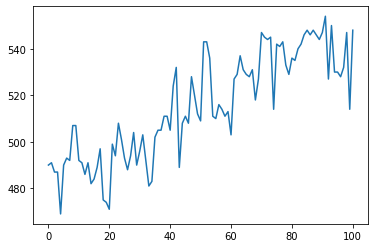

In [32]:
plt.plot(score_list)

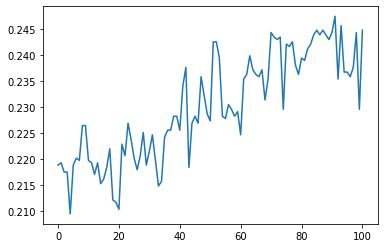

In [33]:
plt.plot(accuracy_list)

# 9. Predict data

In [34]:
def predicting(user_id):
    
    item_dict = dict()
    for i in train[train['user_id'] == user_id]['item_id']:
        if item_cluster[i] in item_dict:            
            item_dict[item_cluster[i]] += 100
        else:
            item_dict[item_cluster[i]] = 100
            
    link_list = list()
    for i in link[link['src'] == user_id]['des']:
        link_list.append(i)
        
    for j in link_list:
        if user_cluster[j] == user_cluster[user_id]:
            w = 10
        else:
            w = 1
        for i in train[train['user_id'] == j]['item_id']:
            if item_cluster[i] in item_dict:            
                item_dict[item_cluster[i]] += w
            else:
                item_dict[item_cluster[i]] = w

    recommender_dict = dict()
    for i in test[test['user_id'] == user_id]['item_id']:
        if item_cluster[i] in item_dict:
            recommender_dict[i] = item_dict[item_cluster[i]]
    
    sort_orders = sorted(recommender_dict.items(), key=lambda x: x[1], reverse=True)
    
    i = 0
    while len(sort_orders) < 10:
        if valid[valid['user_id'] == user_id]['item_id'].tolist()[i] in sort_orders:
            i += 1
        else:
            sort_orders.append([valid[valid['user_id'] == user_id]['item_id'].tolist()[i]])
            i += 1
            
    for i in sort_orders[:10]:
        user_id_list.append(user_id)
        item_id_list.append(i[0])

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=141, random_state=0).fit(item)
item_cluster = kmeans.labels_

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, random_state=0).fit(user)
user_cluster = kmeans.labels_

In [37]:
user_id_list = list()
item_id_list = list()

In [38]:
for i in range(2239):
    predicting(i)

# 10. Output data

In [39]:
df = pd.DataFrame(list(zip(user_id_list, item_id_list)), columns = ['user_id', 'item_id']) 

In [40]:
df.head(50)

,user_id,item_id
0,0,44
1,0,569
2,0,558
3,0,652
4,0,81
5,0,744
6,0,532
7,0,150
8,0,144
9,0,123


In [42]:
df.to_csv('output141.csv', index=False) # cluster 100 is better than 200